In [521]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [522]:
#Loading the files and initializing the columns
col_names=['Sex','Length','Diameter','Height','Whole weight','Shucked Weight','Viscera weight','Shell weight','Rings'] 
df=pd.read_csv('abalone.csv',names=col_names, header=None)

In [523]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [524]:
df.shape

(4177, 9)

In [525]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked Weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [526]:
#checking for the null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked Weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [527]:
#Checking the mean counts of all the columns grouping by Sex
df[['Sex','Length','Diameter','Height','Whole weight','Shucked Weight','Viscera weight','Shell weight']].groupby(['Sex'],as_index=False).mean()

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight
0,F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010
1,I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182
2,M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969


In [528]:
df['Sex'].value_counts(normalize=True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000202F46E7348>,
      dtype=object)

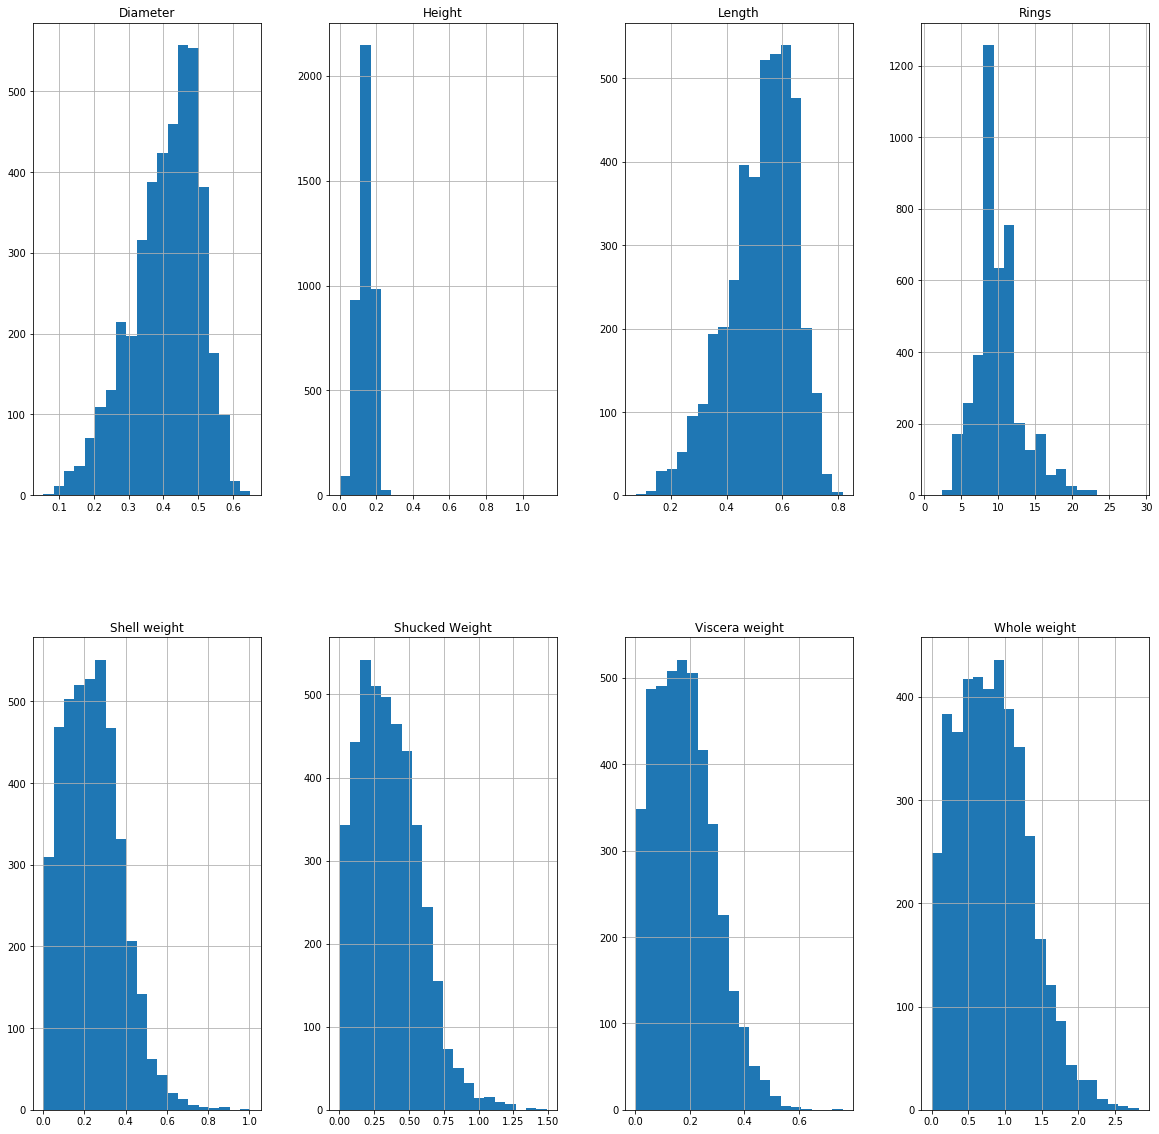

In [529]:
df.hist(figsize=(20,20),grid=True,layout=(2,4),bins=20)

(array([  2.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   2.,   0.,   0.,
          5.,   0.,   6.,   0.,   6.,   0.,  13.,   0.,  11.,   0.,   0.,
         18.,   0.,  25.,   0.,  26.,   0.,  39.,   0.,  47.,   0.,   0.,
         61.,   0.,  76.,   0.,  74.,   0., 124.,   0.,   0.,  91.,   0.,
        145.,   0., 114.,   0., 135.,   0., 133.,   0.,   0., 169.,   0.,
        202.,   0., 169.,   0., 189.,   0., 220.,   0.,   0., 182.,   0.,
        267.,   0., 217.,   0., 205.,   0.,   0., 193.,   0., 160.,   0.,
        211.,   0., 131.,   0., 103.,   0.,   0., 103.,   0.,  78.,   0.,
         68.,   0.,  45.,   0.,  23.,   0.,   0.,  31.,   0.,  17.,   0.,
         13.,   0.,  10.,   0.,   6.,   0.,   0.,   4.,   0.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

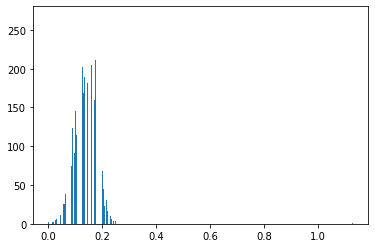

In [530]:
plt.hist(x=df['Height'],bins=500)


In [531]:
#checking for the skewness
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked Weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

(array([104., 153., 184., 184., 161., 218., 211., 206., 208., 209., 198.,
        197., 202., 178., 187., 163., 194., 159., 132., 127., 115.,  88.,
         77.,  68.,  51.,  34.,  27.,  25.,  16.,  21.,  14.,  14.,   5.,
          8.,   5.,   7.,   4.,   5.,   7.,   1.,   2.,   4.,   1.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([1.00000e-03, 3.07400e-02, 6.04800e-02, 9.02200e-02, 1.19960e-01,
        1.49700e-01, 1.79440e-01, 2.09180e-01, 2.38920e-01, 2.68660e-01,
        2.98400e-01, 3.28140e-01, 3.57880e-01, 3.87620e-01, 4.17360e-01,
        4.47100e-01, 4.76840e-01, 5.06580e-01, 5.36320e-01, 5.66060e-01,
        5.95800e-01, 6.25540e-01, 6.55280e-01, 6.85020e-01, 7.14760e-01,
        7.44500e-01, 7.74240e-01, 8.03980e-01, 8.33720e-01, 8.63460e-01,
        8.93200e-01, 9.22940e-01, 9.52680e-01, 9.82420e-01, 1.01216e+00,
        1.04190e+00, 1.07164e+00, 1.10138e+00, 1.13112e+00, 1.16086e+00,
        1.19060e+00, 1.22034e+00, 1.25008e+00, 1.27982e+00, 1.30956e+00,
 

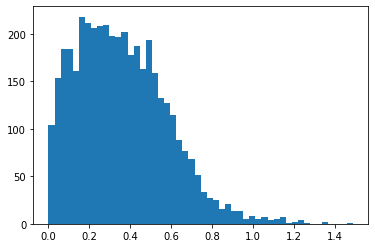

In [532]:
plt.hist(x=df['Shucked Weight'],bins=50)


In [533]:
#Reducing te skewness
import scipy.stats
from scipy.stats import boxcox
df['Height']=np.sqrt(df['Height'])

In [534]:
import scipy.stats
from scipy.stats import boxcox
df['Shucked Weight']=np.sqrt(df['Shucked Weight'])

In [535]:
import scipy.stats
from scipy.stats import boxcox
df['Viscera weight']=np.sqrt(df['Viscera weight'])

In [536]:
import scipy.stats
from scipy.stats import boxcox
df['Shell weight']=np.sqrt(df['Shell weight'])

In [537]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height           -0.295641
Whole weight      0.530959
Shucked Weight   -0.141443
Viscera weight   -0.183321
Shell weight     -0.222772
Rings             1.114102
dtype: float64

(array([3.000e+00, 4.500e+01, 7.260e+02, 2.897e+03, 5.040e+02, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.10630146, 0.21260292, 0.31890437, 0.42520583,
        0.53150729, 0.63780875, 0.74411021, 0.85041167, 0.95671312,
        1.06301458]),
 <a list of 10 Patch objects>)

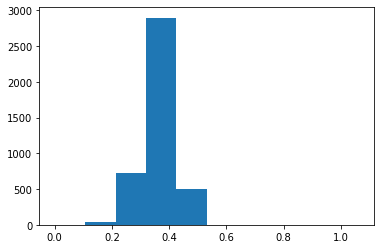

In [538]:
plt.hist(x=df['Height'],bins=10)

In [539]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.369232,0.828742,0.566582,0.402094,0.464496,9.933684
std,0.120093,0.099240,0.056436,0.490389,0.195860,0.137545,0.151921,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.031623,0.022361,0.038730,1.000000
25%,0.450000,0.350000,0.339116,0.441500,0.431277,0.305778,0.360555,8.000000
50%,0.545000,0.425000,0.374166,0.799500,0.579655,0.413521,0.483735,9.000000
75%,0.615000,0.480000,0.406202,1.153000,0.708520,0.502991,0.573585,11.000000
max,0.815000,0.650000,1.063015,2.825500,1.219836,0.871780,1.002497,29.000000


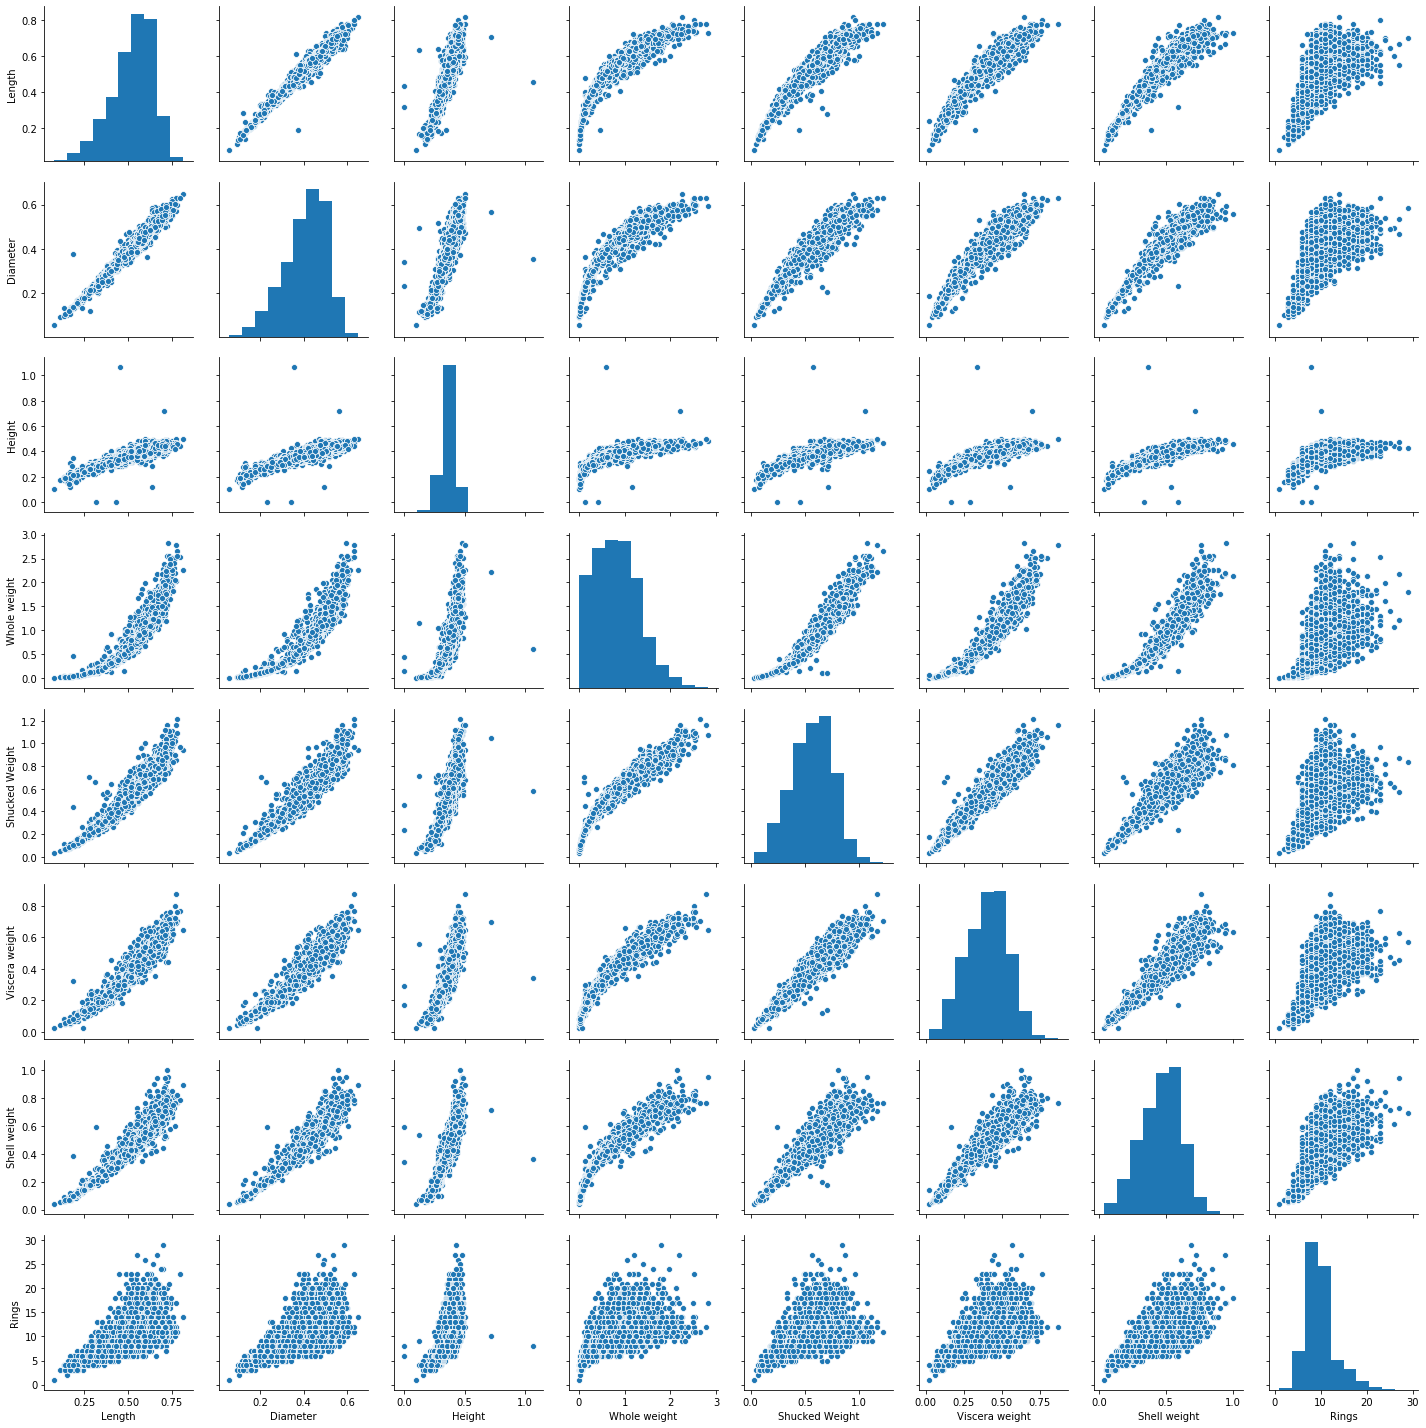

In [540]:
sns.pairplot(data=df)

In [541]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.883322,0.925261,0.955109,0.954247,0.951656,0.556720
Diameter,0.986812,1.000000,0.888117,0.925452,0.950278,0.951027,0.957304,0.574660
Height,0.883322,0.888117,1.000000,0.843708,0.858492,0.877222,0.892520,0.592653
Whole weight,0.925261,0.925452,0.843708,1.000000,0.958586,0.953863,0.944155,0.540390
Shucked Weight,0.955109,0.950278,0.858492,0.958586,1.000000,0.951864,0.923565,0.476697
Viscera weight,0.954247,0.951027,0.877222,0.953863,0.951864,1.000000,0.940828,0.548787
Shell weight,0.951656,0.957304,0.892520,0.944155,0.923565,0.940828,1.000000,0.648237
Rings,0.556720,0.574660,0.592653,0.540390,0.476697,0.548787,0.648237,1.000000


In [542]:
#applying label Encoder technique for the Categorical variable
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])


In [543]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

In [544]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.308221,0.5140,0.473814,0.317805,0.387298,15
1,0,0.350,0.265,0.300000,0.2255,0.315436,0.220227,0.264575,7
2,0,0.530,0.420,0.367423,0.6770,0.506458,0.376165,0.458258,9
3,0,0.440,0.365,0.353553,0.5160,0.464220,0.337639,0.393700,10
4,1,0.330,0.255,0.282843,0.2050,0.299166,0.198746,0.234521,7


In [545]:
#Calculating the zscore

z=np.abs(zscore(df))

In [546]:
z

array([[0.68801788, 0.57455813, 0.43214879, ..., 0.61288115, 0.50820171,
        1.57154357],
       [0.68801788, 1.44898585, 1.439929  , ..., 1.32238919, 1.31610621,
        0.91001299],
       [0.68801788, 0.05003309, 0.12213032, ..., 0.18853461, 0.04106687,
        0.28962385],
       ...,
       [0.68801788, 0.6329849 , 0.67640943, ..., 0.9750425 , 0.59565419,
        0.28962385],
       [0.68801788, 0.84118198, 0.77718745, ..., 0.79101801, 0.52377511,
        0.02057072],
       [0.68801788, 1.54905203, 1.48263359, ..., 1.53787496, 1.57380987,
        0.64095986]])

In [547]:
#removing the outliers
df=df[(z<3).all(axis=1)]
df.shape

(4065, 9)

In [548]:
df.shape

(4065, 9)

In [549]:
df['Rings'].value_counts()

9     687
10    632
8     566
11    482
7     391
12    261
6     257
13    201
14    124
5     111
15    103
16     67
17     55
4      47
18     41
19     32
3       8
Name: Rings, dtype: int64

In [550]:
df.shape

(4065, 9)

In [552]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.308221,0.5140,0.473814,0.317805,0.387298,15
1,0,0.350,0.265,0.300000,0.2255,0.315436,0.220227,0.264575,7
2,0,0.530,0.420,0.367423,0.6770,0.506458,0.376165,0.458258,9
3,0,0.440,0.365,0.353553,0.5160,0.464220,0.337639,0.393700,10
4,1,0.330,0.255,0.282843,0.2050,0.299166,0.198746,0.234521,7


In [553]:
#Finding out te age of the abalone
df['age']=df['Rings']+1.5

In [554]:
df['age'].value_counts()

10.5    687
11.5    632
9.5     566
12.5    482
8.5     391
13.5    261
7.5     257
14.5    201
15.5    124
6.5     111
16.5    103
17.5     67
18.5     55
5.5      47
19.5     41
20.5     32
4.5       8
Name: age, dtype: int64

In [555]:
df.skew()

Sex               0.754889
Length           -0.579031
Diameter         -0.561764
Height           -0.550813
Whole weight      0.430867
Shucked Weight   -0.151644
Viscera weight   -0.179804
Shell weight     -0.237702
Rings             0.724645
age               0.724645
dtype: float64

In [557]:
df=df.drop(['Sex'],axis=1)

In [558]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight,Rings,age
0,0.455,0.365,0.308221,0.5140,0.473814,0.317805,0.387298,15,16.5
1,0.350,0.265,0.300000,0.2255,0.315436,0.220227,0.264575,7,8.5
2,0.530,0.420,0.367423,0.6770,0.506458,0.376165,0.458258,9,10.5
3,0.440,0.365,0.353553,0.5160,0.464220,0.337639,0.393700,10,11.5
4,0.330,0.255,0.282843,0.2050,0.299166,0.198746,0.234521,7,8.5


In [559]:
df=df.drop(['Rings'],axis=1)

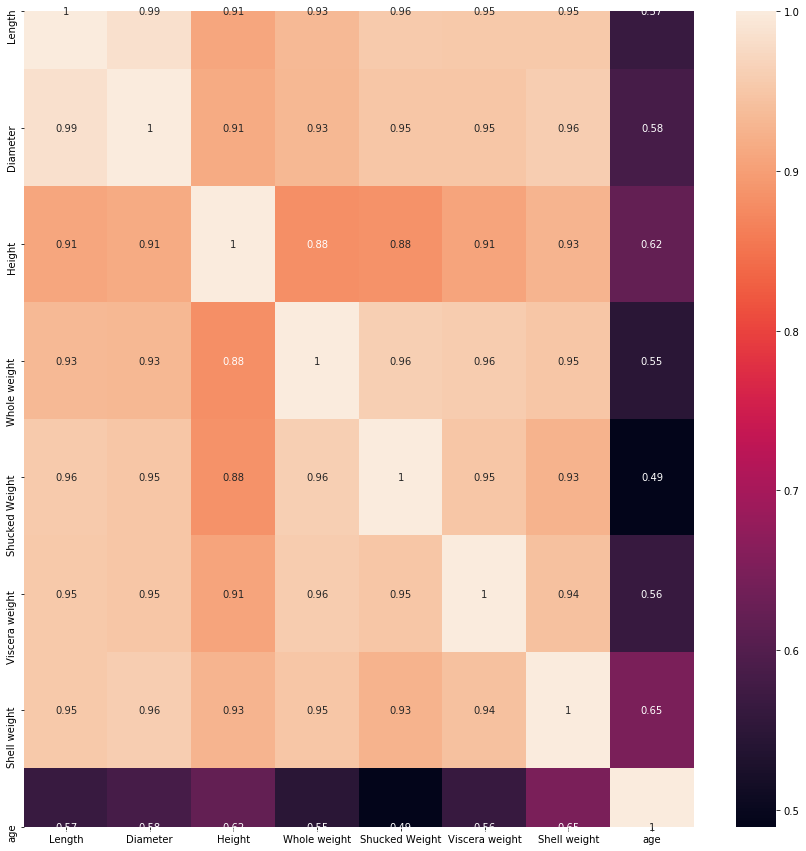

In [560]:
hmap=df.corr()
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(hmap,annot=True,ax=ax)

In [561]:
df.shape

(4065, 8)

In [562]:
y=df.iloc[:,7:8]
y.head()

,age
0,16.5
1,8.5
2,10.5
3,11.5
4,8.5


In [563]:
x=df.drop(['age'],axis=1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked Weight,Viscera weight,Shell weight
0,0.455,0.365,0.308221,0.5140,0.473814,0.317805,0.387298
1,0.350,0.265,0.300000,0.2255,0.315436,0.220227,0.264575
2,0.530,0.420,0.367423,0.6770,0.506458,0.376165,0.458258
3,0.440,0.365,0.353553,0.5160,0.464220,0.337639,0.393700
4,0.330,0.255,0.282843,0.2050,0.299166,0.198746,0.234521


In [564]:
#applying statndard scaler technique
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [565]:
x=pd.DataFrame(data=x)
x.head()

,0,1,2,3,4,5,6
0,0.446154,0.462264,0.360736,0.218917,0.376147,0.405474,0.380485
1,0.284615,0.273585,0.333333,0.090808,0.222294,0.271556,0.232993
2,0.561538,0.566038,0.558078,0.291297,0.407858,0.485569,0.465766
3,0.423077,0.462264,0.511845,0.219805,0.366826,0.432695,0.388179
4,0.253846,0.254717,0.276142,0.081705,0.206489,0.242075,0.196872


In [597]:
#applying linear regresssion and finding out the best random state for best accuracy score
max_rscore=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r_scr=r2_score(y_test,pred)
    print("R2 corresponding to random state:",r_state,"is:",r_scr)
    if r_scr>max_rscore:
        max_rscore=r_scr
        final_r_state=r_state
print()
print("max R2 score corresponding to r_state is",final_r_state,"is:",max_rscore)

R2 corresponding to random state: 42 is: 0.5266441190267345
R2 corresponding to random state: 43 is: 0.4984674805797611
R2 corresponding to random state: 44 is: 0.5654276368670385
R2 corresponding to random state: 45 is: 0.5026012321005335
R2 corresponding to random state: 46 is: 0.5227556070984557
R2 corresponding to random state: 47 is: 0.4751100759934378
R2 corresponding to random state: 48 is: 0.49107137447033034
R2 corresponding to random state: 49 is: 0.508156924536706
R2 corresponding to random state: 50 is: 0.5255350388499402
R2 corresponding to random state: 51 is: 0.5296703961664982
R2 corresponding to random state: 52 is: 0.5470959546866334
R2 corresponding to random state: 53 is: 0.5260783393622754
R2 corresponding to random state: 54 is: 0.5154622221024013
R2 corresponding to random state: 55 is: 0.503204359582955
R2 corresponding to random state: 56 is: 0.5167707936957493
R2 corresponding to random state: 57 is: 0.5239341261938464
R2 corresponding to random state: 58 is: 

In [569]:
from sklearn.metrics import mean_squared_log_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
print("The Score is:",knn.score(x_test,y_test))
print("The Root Mean square is:",np.sqrt(mean_squared_log_error(y_test,pred)))



The Score is: 0.50660179138097
The Root Mean square is: 0.149206160168019


In [590]:
from sklearn.svm import SVR
model=SVR(kernel='rbf')
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10, 20 ,100]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid1_search = GridSearchCV(model, param_grid, cv=3)

In [591]:
grid1_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 100],
                         'gamma': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [592]:
grid1_search.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [593]:
model_new = SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

model_new.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model_new.predict(x)
    score = model_new.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
      

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.5542714835629128
The r2 Score is: 0.5542714835629128
The score is: 0.5741943600407732
The r2 Score is: 0.5741943600407732


In [586]:
#using GridSearchCV to find the best parameters for RandomForest Classifier
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [5,10, 15, 20, 25, None],    
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [25, 50, 100, 200]}

grid_search = GridSearchCV(model, params, cv = 3)

In [587]:
grid_search.fit(x_train, y_train) 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20, 25

In [516]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [517]:
from sklearn.metrics import r2_score
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    score = model.score(x, y)    
    r2_scr=r2_score(y,pred)
    print("The score is:",score)
    print("The r2 Score is:",r2_scr)
        

evaluate(x_train, y_train, 'training')
evaluate(x_test, y_test, 'test')

The score is: 0.7259927292538759
The r2 Score is: 0.7259927292538759
The score is: 0.47122257906917897
The r2 Score is: 0.47122257906917897


In [594]:
# further check all the model and found that the Support vector is showing the best results

In [596]:
from sklearn.externals import joblib
joblib.dump(model,'abalone_regression.pkl')

['abalone_regression.pkl']